We want to use bootstrapping to measure the 5th percentile.

In [11]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')
import numpy as np
import scipy.stats as stats

In [12]:
conn = psycopg2.connect("host=localhost,dbname=postgres,user=postgres")

cur = conn.cursor()

In [13]:
group_and_as = """
SELECT 
  grade.a_count
, grade.ab_count
, grade.b_count
, grade.bc_count
, grade.c_count
, grade.d_count
, grade.f_count
, sched.start_time
, sched.end_time
, sect.section_type
FROM 
  sections sect
INNER JOIN 
  schedules sched 
ON 
  sched.uuid = sect.schedule_uuid
INNER JOIN 
  grade_distributions grade 
ON 
  sect.number = grade.section_number 
AND 
  sect.course_offering_uuid = grade.course_offering_uuid;
"""

In [14]:
cur.execute(group_and_as)
df = pd.DataFrame(cur.fetchall())
df.columns = [i[0] for i in cur.description]
df['total_count'] = (df['a_count'] + df['ab_count'] + df['b_count'] + df['bc_count'] 
                     + df['c_count'] + df['d_count'] + df['f_count'])
df.head()

,a_count,ab_count,b_count,bc_count,c_count,d_count,f_count,start_time,end_time,section_type,total_count
0,0,0,0,0,0,0,0,-1,-1,FLD,0
1,40,5,0,0,0,0,0,725,775,LAB,45
2,40,1,1,0,0,0,0,660,710,LAB,42
3,22,16,0,0,0,0,0,725,775,LAB,38
4,27,3,2,0,1,0,1,930,980,LAB,34


In [19]:
df = df[(df['total_count'] != 0)]
df2 = df.copy()

df2['ratio_of_as'] = df['a_count'] / df['total_count']
df2.drop_duplicates(inplace=True)
df2.head()

,a_count,ab_count,b_count,bc_count,c_count,d_count,f_count,start_time,end_time,section_type,total_count,ratio_of_as
1,40,5,0,0,0,0,0,725,775,LAB,45,0.888889
2,40,1,1,0,0,0,0,660,710,LAB,42,0.952381
3,22,16,0,0,0,0,0,725,775,LAB,38,0.578947
4,27,3,2,0,1,0,1,930,980,LAB,34,0.794118
5,29,1,1,0,0,0,0,725,775,LAB,31,0.935484


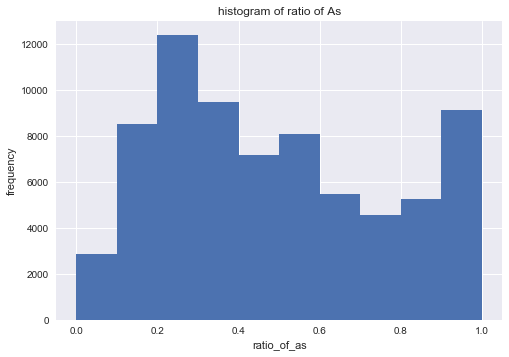

In [20]:
df2['ratio_of_as'].hist()
plt.xlabel('ratio_of_as')
plt.ylabel('frequency')
plt.title('histogram of ratio of As')
plt.show()

In [21]:
sample = np.random.choice(df2['ratio_of_as'], size=1000)

In [22]:
len(sample)

1000

In [23]:
sample.mean()

0.48402761555352813

In [26]:
bootstrap_samples = []
bootstrap_sample_5pcts = np.zeros(1000)
for i in range(1000):
    bootstrap_sample = np.random.choice(sample, size=1000)
    bootstrap_samples.append(bootstrap_sample)
    bootstrap_sample_5pct = np.percentile(a=bootstrap_sample, q=5)
    bootstrap_sample_5pcts[i] = bootstrap_sample_5pct

In [27]:
bootstrap_sample_5pcts[:10]

array([0.11532967, 0.11111111, 0.09756098, 0.10327586, 0.11111111,
       0.0997619 , 0.1       , 0.10327586, 0.11732026, 0.11412698])

(array([  2.,   4.,  46., 303., 184., 193., 165.,  48.,  48.,   7.]),
 array([0.07777778, 0.08353046, 0.08928314, 0.09503583, 0.10078851,
        0.10654119, 0.11229388, 0.11804656, 0.12379924, 0.12955193,
        0.13530461]),
 <a list of 10 Patch objects>)

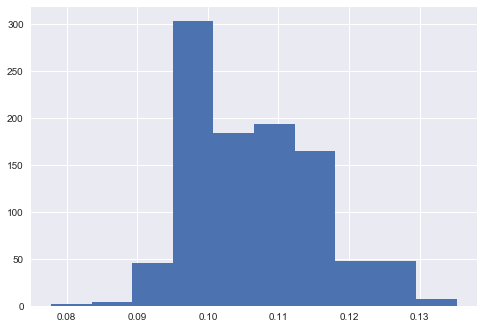

In [28]:
plt.hist(bootstrap_sample_5pcts)

In [29]:
np.percentile(a=bootstrap_sample_5pcts, q=2.5)

0.09090909090909091

In [30]:
np.percentile(a=bootstrap_sample_5pcts, q=97.5)

0.125

In [32]:
np.percentile(a=df2['ratio_of_as'], q=5)

0.1111111111111111